In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
mnist = tf.keras.datasets.mnist

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [4]:
# Scaling the data
X_train, X_test = X_train/255.0, X_test/255.0

# ANN for classification

In [5]:
model_classification = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [6]:
model_classification.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [7]:
model_classification.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [8]:
fit_classification = model_classification.fit(
    x=X_train,
    y=y_train,
    validation_data=(X_test, y_test),
    epochs=15
)

Epoch 1/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4780 - accuracy: 0.8605 - val_loss: 0.1368 - val_accuracy: 0.9586
Epoch 2/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1472 - accuracy: 0.9562 - val_loss: 0.0951 - val_accuracy: 0.9709
Epoch 3/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1120 - accuracy: 0.9665 - val_loss: 0.0854 - val_accuracy: 0.9728
Epoch 4/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0859 - accuracy: 0.9742 - val_loss: 0.0726 - val_accuracy: 0.9766
Epoch 5/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0745 - accuracy: 0.9769 - val_loss: 0.0742 - val_accuracy: 0.9775
Epoch 6/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0643 - accuracy: 0.9803 - val_loss: 0.0742 - val_accuracy: 0.9771
Epoch 7/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0556 - accuracy: 0.9825 - val_loss: 0.0697 - val_accuracy:

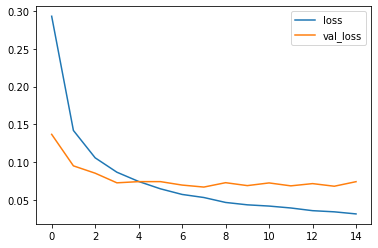

In [9]:
plt.plot(fit_classification.history['loss'], label='loss')
plt.plot(fit_classification.history['val_loss'], label='val_loss')
plt.legend()

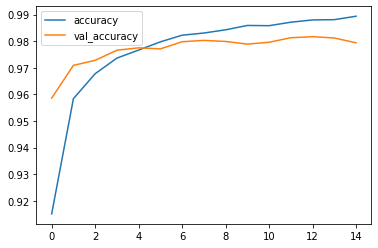

In [10]:
plt.plot(fit_classification.history['accuracy'], label='accuracy')
plt.plot(fit_classification.history['val_accuracy'], label='val_accuracy')
plt.legend()

In [11]:
# Perhaps plot some of the missclassified images

# ANN for regression

The synthetic data used to train the neural networks has the form.

$$y = cos(2x_{1}) + cos(3x_{2})$$

In [12]:
# Make the data set
N = 10000
X = np.random.random((N, 2)) * 6 - 3
y = np.cos(2*X[:,0]) + np.cos(3*X[:,1])

In [13]:
model_regression =  tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(2,)),
    tf.keras.layers.Dense(1)
])

In [14]:
model_regression.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 128)               384       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 129       
Total params: 513
Trainable params: 513
Non-trainable params: 0
_________________________________________________________________


In [15]:
adam_opt = tf.keras.optimizers.Adam(0.01)
model_regression.compile(
    optimizer=adam_opt,
    loss='mse'
)

In [16]:
fit_regression = model_regression.fit(x=X, y=y, epochs=100)

Epoch 1/100
313/313 [==============================] - 1s 975us/step - loss: 0.8789
Epoch 2/100
313/313 [==============================] - 0s 928us/step - loss: 0.5593
Epoch 3/100
313/313 [==============================] - 0s 950us/step - loss: 0.4414
Epoch 4/100
313/313 [==============================] - 0s 927us/step - loss: 0.3256
Epoch 5/100
313/313 [==============================] - 0s 922us/step - loss: 0.1555
Epoch 6/100
313/313 [==============================] - 0s 1ms/step - loss: 0.0461
Epoch 7/100
313/313 [==============================] - 0s 969us/step - loss: 0.0144
Epoch 8/100
313/313 [==============================] - 0s 972us/step - loss: 0.0136
Epoch 9/100
313/313 [==============================] - 0s 933us/step - loss: 0.0142
Epoch 10/100
313/313 [==============================] - 0s 995us/step - loss: 0.0178
Epoch 11/100
313/313 [==============================] - 0s 994us/step - loss: 0.0167
Epoch 12/100
313/313 [==============================] - 0s 919us/step - loss

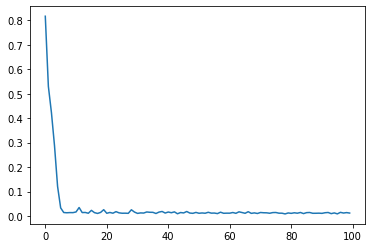

In [17]:
plt.plot(fit_regression.history['loss'], label='loss')

In [ ]:
# Perhaps plot the prediction surface